In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import joblib


In [69]:
# Data load
data_csv = 'Project 1 Data.csv'
df = pd.read_csv(data_csv)

,X,Y,Z,Step
0,9.375,3.0625,0.50,1
1,9.375,3.0625,0.51,1
2,9.375,3.0625,0.52,1
3,9.375,3.0625,0.53,1
4,9.375,3.0625,0.54,1
...,...,...,...,...
855,0.000,3.0625,1.89,13
856,0.000,3.0625,1.90,13
857,0.000,3.0625,1.91,13
858,0.000,3.0625,1.92,13


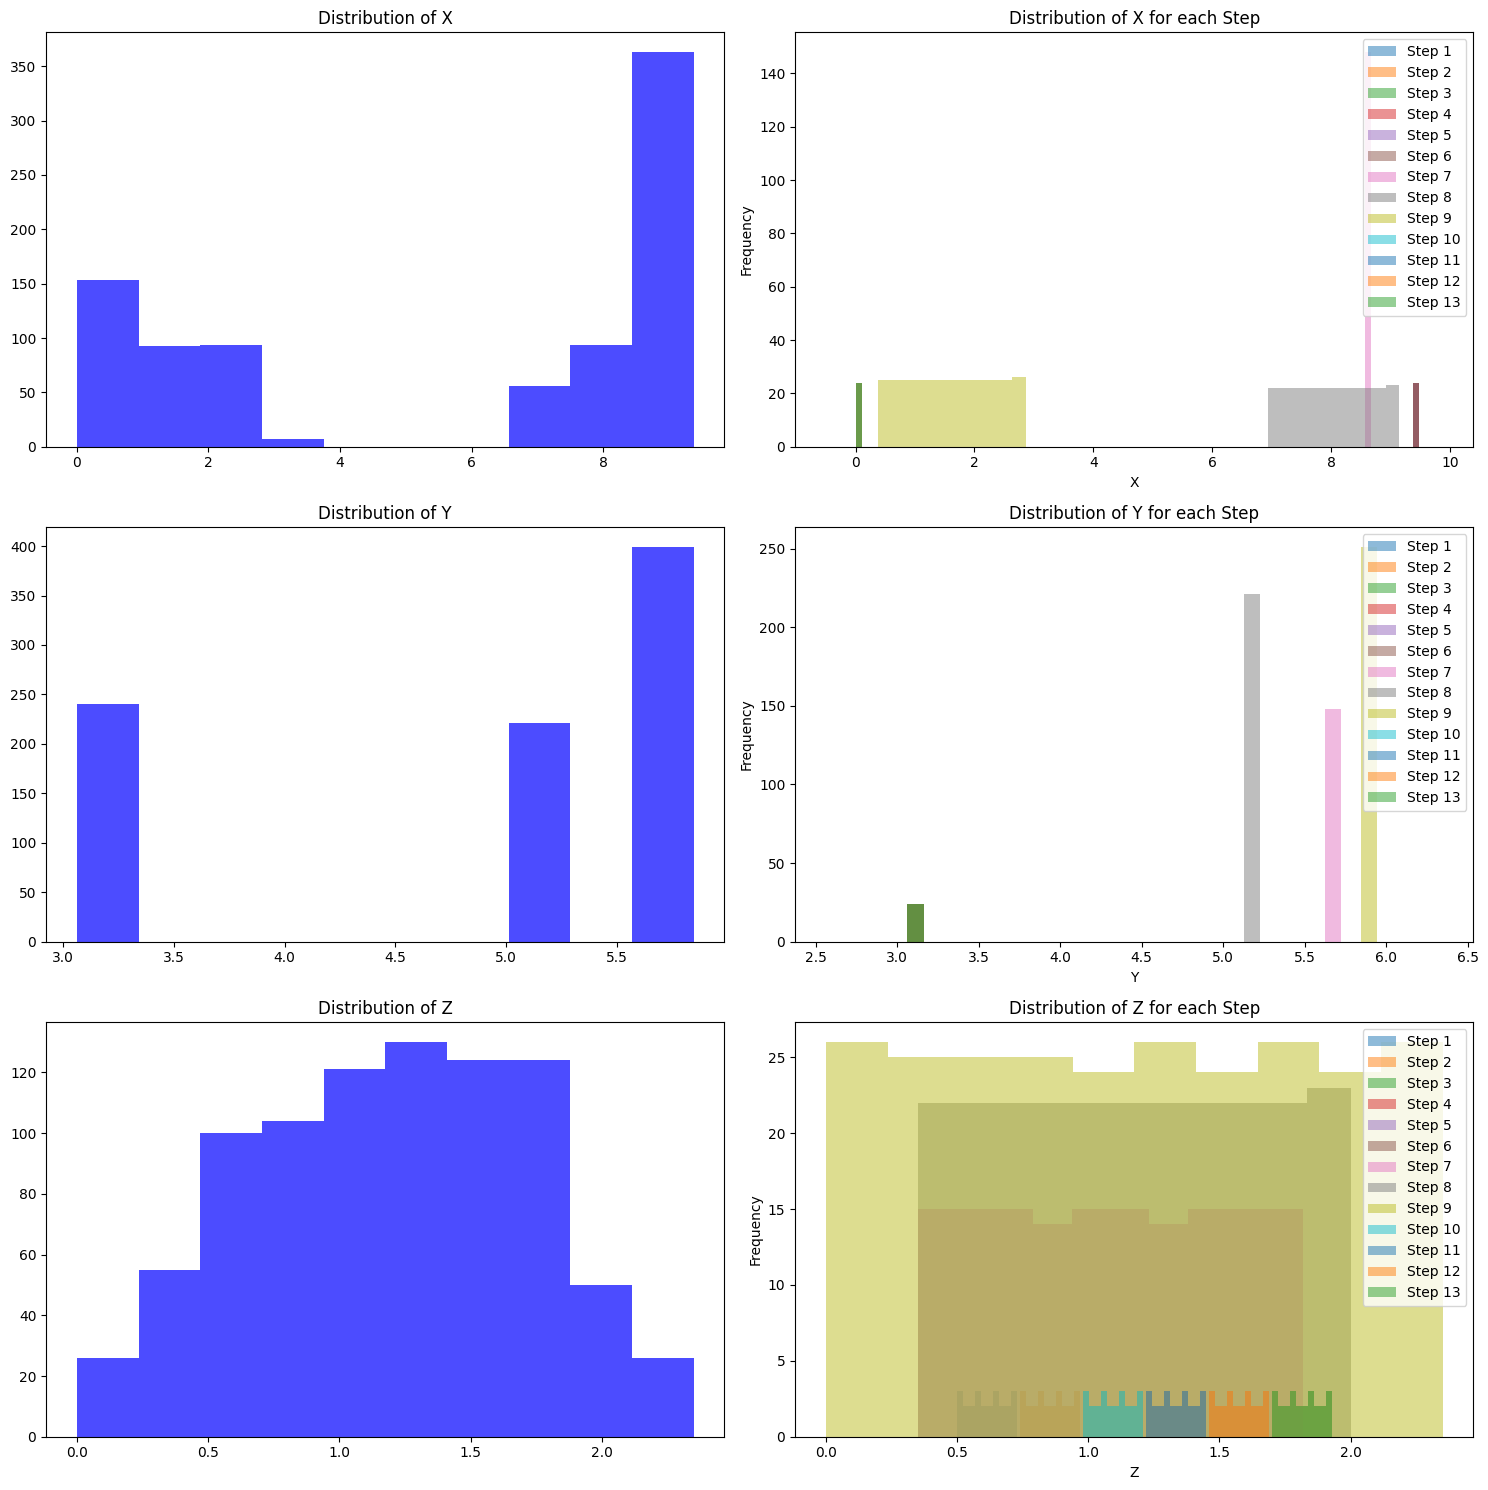

In [70]:
# For each variable, plotting the dsitribution of the variable and the distribution of the variable for each step
count=1
plt.figure(figsize=(15, 15))
for col in df.columns[:-1]:  # Exclude step column
    
    plt.subplot(3,2,count)
    plt.hist(df[col], color='blue', alpha=0.7)
    plt.title('Distribution of ' + col)
    
    plt.subplot(3,2,count+1)
    # Iterating through each step and plotting
    for step in df['Step'].unique():
        step_data = df[df['Step'] == step][col]
        plt.hist(step_data, alpha=0.5, label=f'Step {step}')

    plt.title(f'Distribution of ' + col + ' for each Step')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    count+=2
plt.tight_layout()
plt.show()

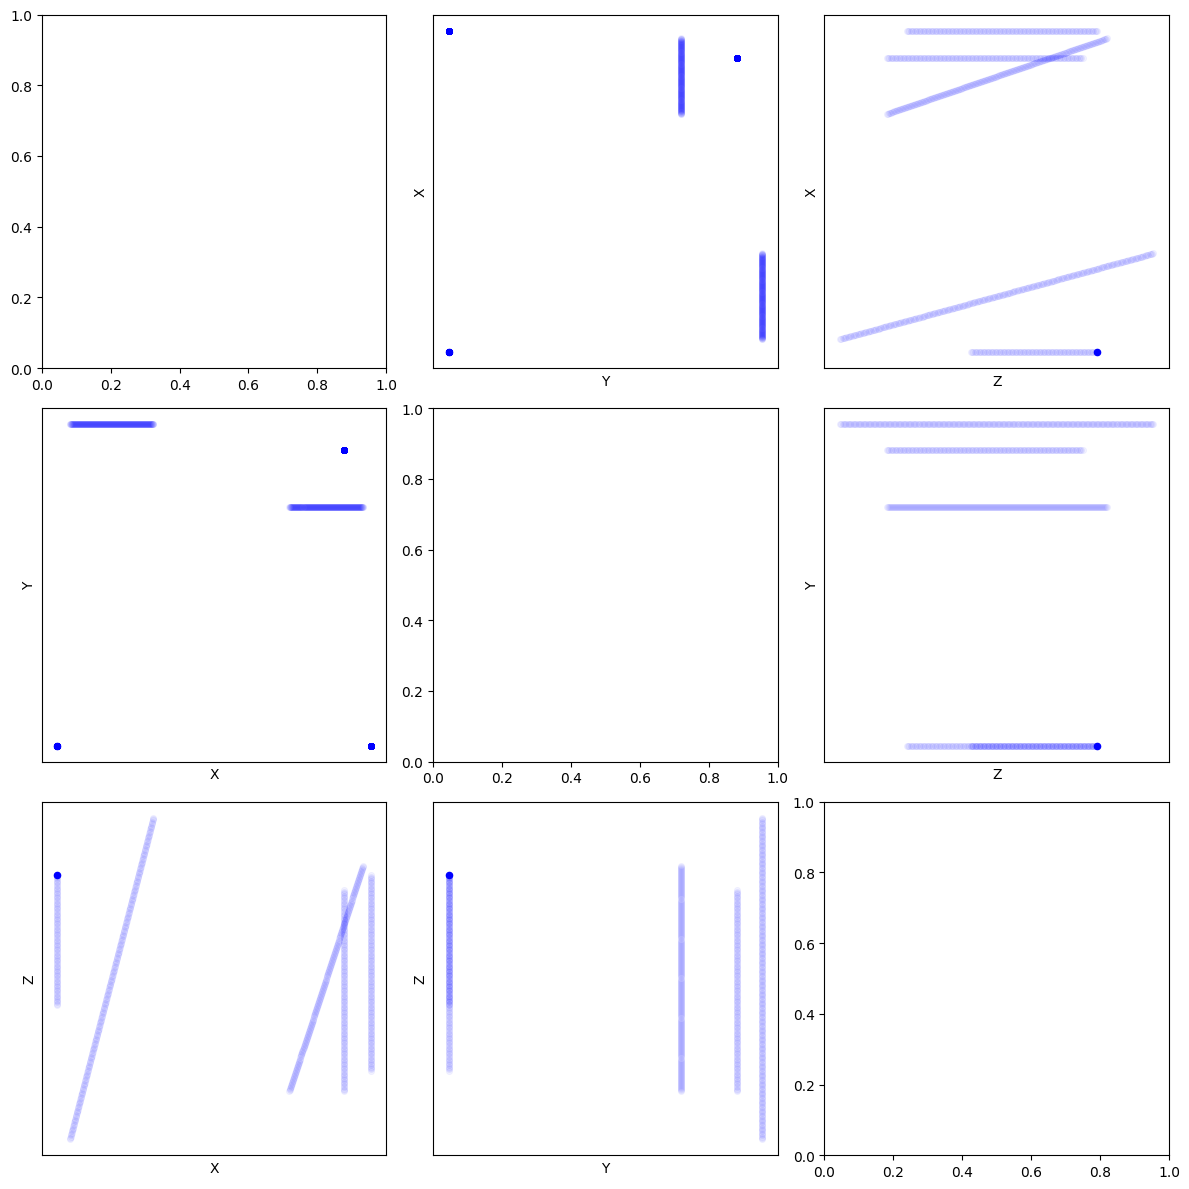

In [71]:
# Plotting pairwise scatter plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Looping through each combination of variables
for i, col1 in enumerate(['X', 'Y', 'Z']):
    for j, col2 in enumerate(['X', 'Y', 'Z']):
        if col1 != col2:  # Exclude x,x/y,y/z,z combinations
            ax = axes[i, j]
            ax.scatter(df[col2], df[col1], color='blue', alpha=0.05, s=20, linewidth=0.5)
            ax.set_xlabel(col2)
            ax.set_ylabel(col1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.scatter(df[col2].iloc[-1], df[col1].iloc[-1], color='blue', alpha=1, s=20) # Making final position more opaque
plt.tight_layout()
plt.show()

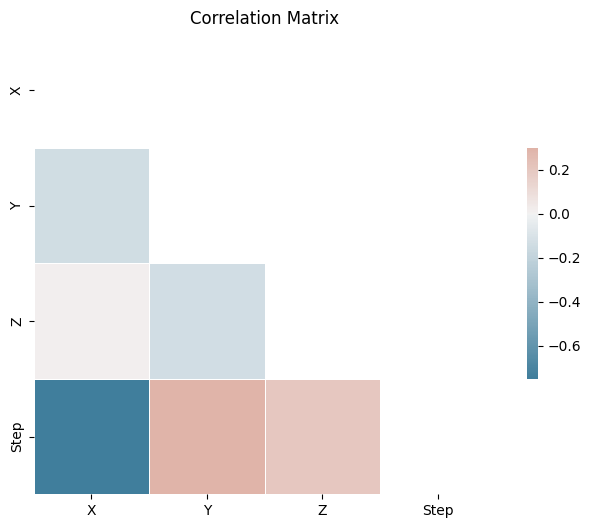

In [72]:
# Computing the correlation matrix
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Masking upper trinangle to hide reflection
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

In [85]:
# Defining features and target
X = df[['X', 'Y', 'Z']]
y = df['Step']

# Splitting the data into training and testing sets and preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [10, 20, 30], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_params = rf_grid_search.best_params_
print(f'Best Random Forest Parameters: {best_rf_params}')

# Model 2: Support Vector Classifier (SVC)
svc_classifier = SVC(random_state=42)
svc_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', 'poly']}
svc_grid_search = GridSearchCV(svc_classifier, svc_params, cv=5)
svc_grid_search.fit(X_train, y_train)
best_svc_params = svc_grid_search.best_params_
print(f'Best SVC Parameters: {best_svc_params}')

# Model 3: Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_params = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
logistic_grid_search = GridSearchCV(logistic_classifier, logistic_params, cv=5)
logistic_grid_search.fit(X_train_scaled, y_train)
best_logistic_params = logistic_grid_search.best_params_
print(f'Best Logistic Regression Parameters: {best_logistic_params}')

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 10}
Best SVC Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best Logistic Regression Parameters: {'C': 10, 'solver': 'lbfgs'}


Model: Random Forest
F1 Score: 0.9762
Precision: 0.9794
Accuracy: 0.9767

Model: Support Vector Classifier
F1 Score: 0.9763
Precision: 0.9794
Accuracy: 0.9767

Model: Logistic Regression
F1 Score: 0.9826
Precision: 0.9847
Accuracy: 0.9826

The best model is Logistic Regression with an f1 score of 0.9826

Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7]]


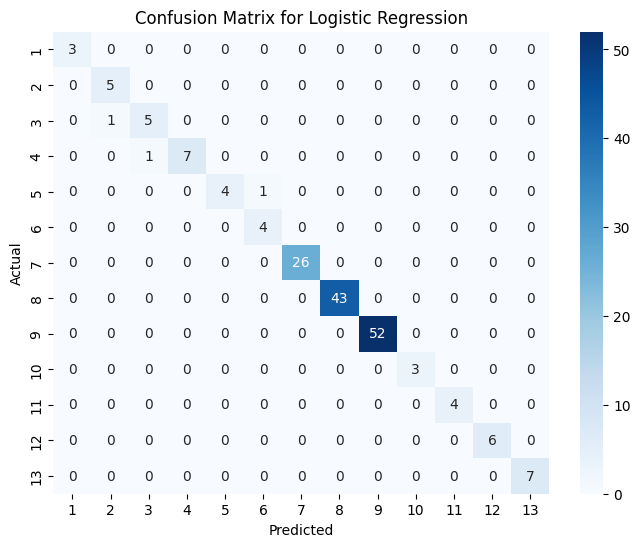

In [84]:
# Defining the best models with their respective hyperparameters
best_rf_model = rf_grid_search.best_estimator_
best_svc_model = svc_grid_search.best_estimator_
best_logistic_model = logistic_grid_search.best_estimator_

models = {
    'Random Forest': best_rf_model,
    'Support Vector Classifier': best_svc_model,
    'Logistic Regression': best_logistic_model
}

best_model_name = None
best_model = None
best_f1_score = 0

# Evaluating models and select the best based on f1 score
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}\n')
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model_name = model_name
        best_model = model

print(f'The best model is {best_model_name} with an f1 score of {best_f1_score:.4f}\n')

y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=best_model.classes_, columns=best_model.classes_)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

In [82]:
# Saving the selected model
model_filename = 'selected_model.joblib'
joblib.dump(best_model, model_filename)

# Loading the model and generating a prediction
loaded_model = joblib.load(model_filename)

new_coordinates = [
    [9.375, 3.0625, 1.51],
    [6.995, 5.125, 0.3875],
    [0, 3.0625, 1.93],
    [9.4, 3, 1.8],
    [9.4, 3, 1.3]
]

predicted_steps = loaded_model.predict(new_coordinates)

print(f'Predicted Maintenance Steps:')
for i, coordinates in enumerate(new_coordinates):
    print(f'Coordinates: {coordinates} => Predicted Step: {predicted_steps[i]}')

Predicted Maintenance Steps:
Coordinates: [9.375, 3.0625, 1.51] => Predicted Step: 5
Coordinates: [6.995, 5.125, 0.3875] => Predicted Step: 8
Coordinates: [0, 3.0625, 1.93] => Predicted Step: 13
Coordinates: [9.4, 3, 1.8] => Predicted Step: 6
Coordinates: [9.4, 3, 1.3] => Predicted Step: 4


/Users/Miq313/.pyenv/versions/3.9.5/envs/aer850/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
